In [1]:
import os
import numpy
import torch
from pathlib import Path
from PIL import Image
import matplotlib.pyplot as plt
from tqdm import tqdm
import random
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader
from torchvision import transforms, datasets
import shutil

In [2]:
''' SET THE DEVICE '''
device = 'mps' if torch.mps.is_available() else 'cpu'

In [3]:
import kagglehub
''' UNCOMMENT THE FOLLOWING LINES TO DOWNLOAD DATASET '''
#path = kagglehub.dataset_download('mostafaabla/garbage-classification')
#print('path to dataset files', path)

/Users/kazikgarstecki/Desktop/Y2S2/as_project/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


' UNCOMMENT THE FOLLOWING LINES TO DOWNLOAD DATASET '

In [4]:
dir_path = os.path.join(os.getcwd(), 'data/garbage_classification/')

print('All catgories of garbage classification dataset')
print('----------------------------------------------------')
for file in os.listdir(dir_path):
    print(file)

All catgories of garbage classification dataset
----------------------------------------------------
paper
green-glass
clothes
metal
cardboard
trash
biological
white-glass
battery
brown-glass
plastic
shoes


100%|██████████| 1977/1977 [00:11<00:00, 168.65it/s]


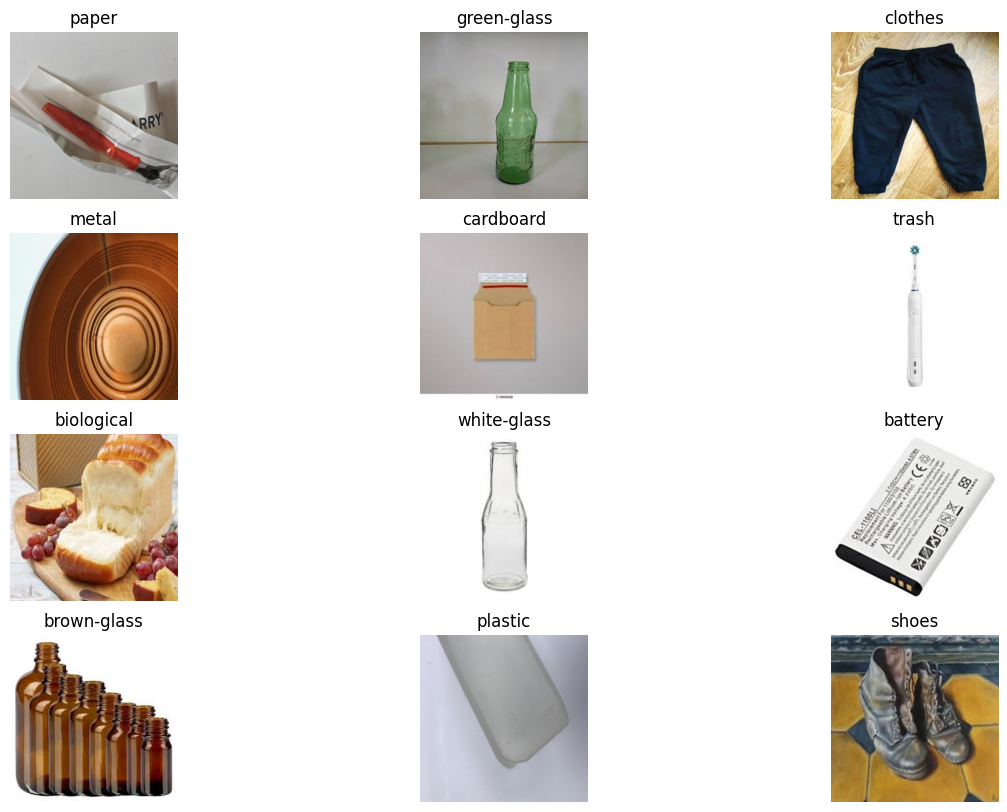

In [5]:
data_dict = {directory_name: [] for directory_name in os.listdir(dir_path)}

data_path = Path('data/garbage_classification/')

for category_name in data_dict.keys():
    image_dir = data_path / category_name
    for image in tqdm(os.listdir(image_dir)):
        img = Image.open(image_dir / image)
        img = img.resize((512, 512))
        data_dict[category_name].append(img)

fig, ax = plt.subplots(4, 3, figsize=(15, 10), sharex=False, sharey=False)
images = [data_dict[category_name][0] for category_name in data_dict.keys()]

for ax, img, title in zip(fig.axes, images, data_dict.keys()):
    ax.set_title(title)
    ax.imshow(img)
    ax.axis('off')

In [6]:
for img in images:
    print(img.size)

(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)


In [7]:
simple_transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor(),
])

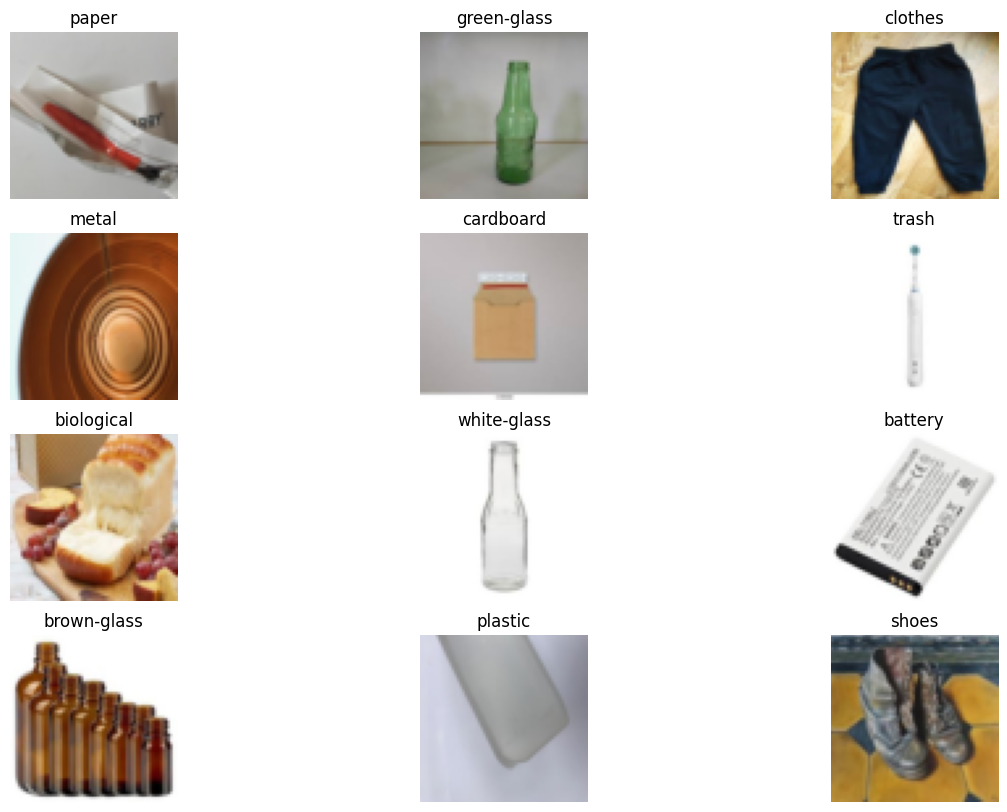

In [8]:
def plot_transformed_images(images, transform):
    fig, ax = plt.subplots(4, 3, figsize=(15, 10), sharex=False, sharey=False)
    transformed_images = [transform(img) for img in images]

    for ax, img, title in zip(fig.axes, transformed_images, data_dict.keys()):
        ax.set_title(title)
        ax.imshow(img.permute(1, 2, 0))
        ax.axis('off')

    plt.show()

plot_transformed_images(images, simple_transform)

In [9]:
for category_name in data_dict.keys():
    image_dir = data_path / category_name
    train_set = random.sample()

TypeError: Random.sample() missing 2 required positional arguments: 'population' and 'k'

In [ ]:
train_test_dataset = Path('train_test_dataset/garbage_classification')
if not os.path.exists(train_test_dataset):
    os.makedirs(train_test_dataset)

for category_name in tqdm(data_dict.keys()):
    image_dir = data_path / category_name
    all_images = os.listdir(image_dir)
    img = Image.open(image_dir / all_images[0])
    train_images = random.sample(all_images, int(len(all_images) * 0.8))
    test_images = list(set(all_images) - set(train_images))
    for image in train_images:
        path_to_move = train_test_dataset / category_name / 'train'
        if not os.path.exists(path_to_move):
            os.makedirs(path_to_move)
        img_path = image_dir / image
        shutil.copy(img_path, path_to_move)
    for image in test_images:
        path_to_move = train_test_dataset / category_name / 'test'
        if not os.path.exists(path_to_move):
            os.makedirs(path_to_move)
        img_path = image_dir / image
        shutil.copy(img_path, path_to_move)

100%|██████████| 12/12 [00:35<00:00,  2.96s/it]
